In [1]:
import json
import pandas as pd
import numpy as np
from os.path import join
from dn_utils.path import path

In [2]:
from dn_utils.plotting import plot_matrix
%matplotlib inline

/home/kmb/Desktop/Neuroscience/Projects/BONNA_decide_net/code/dn_utils/glm_utils.py:13: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  from nistats import design_matrix


In [3]:
atlas = "combined_roi_4and5"
gamma = 2

In [4]:
# Create additional paths
gamma_str = str(float(gamma)).replace('.', '_')
path_corrmats = join(path["bsc"], "corrmats")
path_corrmats_unthr = join(path_corrmats, atlas, "unthr")
path_corrmats_unthr_gamma = join(path_corrmats_unthr, f"gamma_{gamma_str}")

# Load subject exclusion
df_exclusion = pd.read_csv(join(path["nistats"], "exclusion/exclusion.csv"), 
                           index_col=0)
ok_index = df_exclusion["ok_all"]

# Meta information about corrmats dimensions
with open(join(path_corrmats, atlas, "corrmats_aggregated.json"), "r") as f:
    corrmats_meta = json.loads(f.read()) 

# Load graph measures
d = np.load(join(path_corrmats_unthr_gamma, "d_networks.npy"))    
d_null = np.load(join(path_corrmats_unthr_gamma, "d_networks_null.npy"))
d_fstats = np.load(join(path_corrmats_unthr_gamma, "d_fstats.npy"))
d_pvals = np.load(join(path_corrmats_unthr_gamma, "d_pvals.npy"))

d = d[ok_index]
d_null = d_null[:, ok_index]

n_reps = len(d_null)
n_subjects = len(corrmats_meta["dim1"])
n_subjects_ok, n_conditions, n_perr_sign, n_networks, _ = d.shape

# Load ROI information
df_roi = pd.read_csv(
    join(path_corrmats, atlas, "roi_table_filtered.csv"), index_col=0)
df_roi = df_roi.reset_index()
network_names = df_roi["netName"].unique()

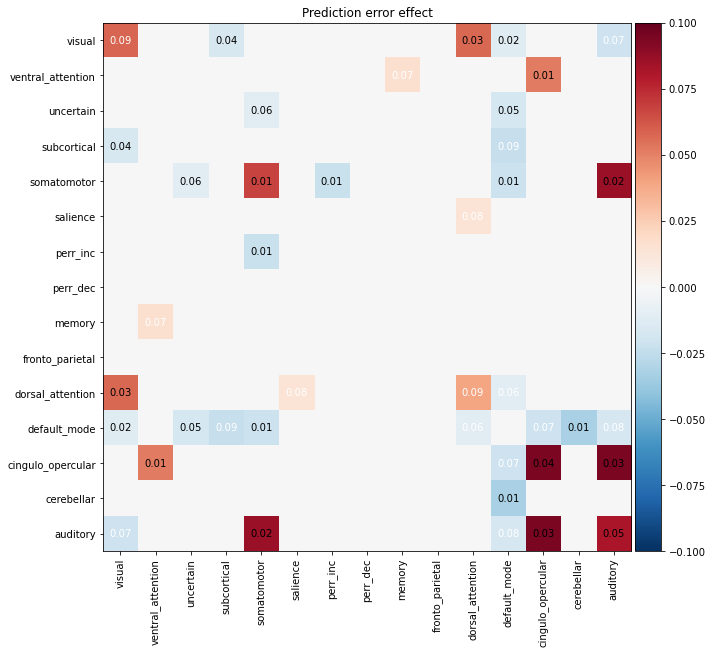

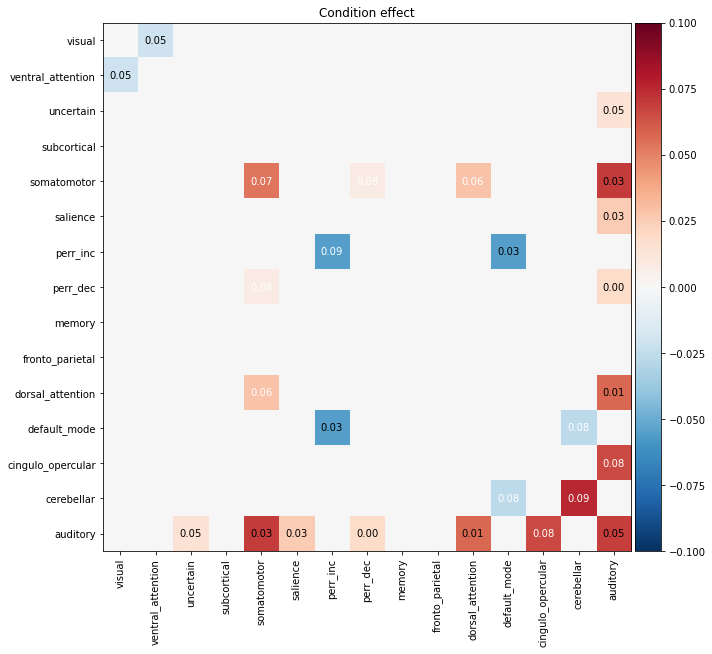

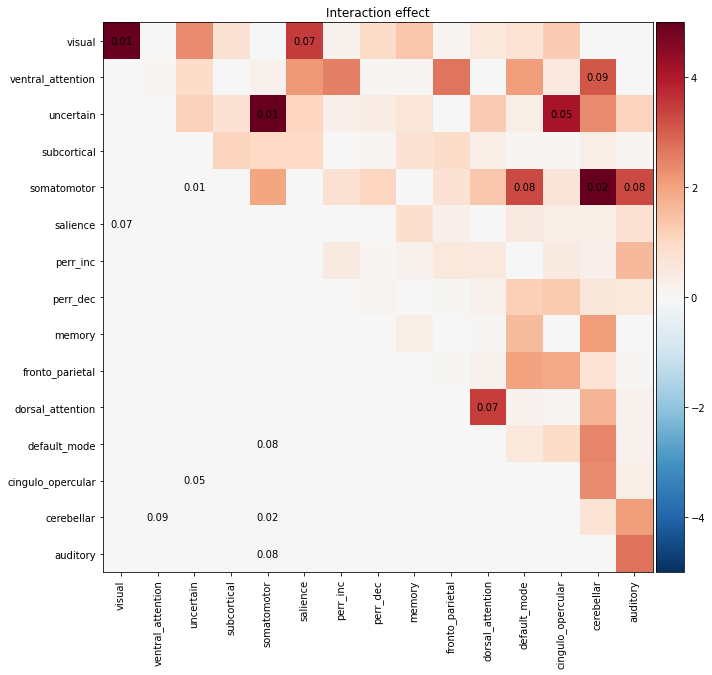

In [5]:
threshold = 0.1

# Prediction error effect
p = d_pvals[1]
p = p + np.tril(p.T, k=-1)

d_inc_dec = np.mean(d, axis=(0, 1))[0] - np.mean(d, axis=(0, 1))[1]
plot_matrix(
    d_inc_dec * (p < threshold), 
    labels=network_names, 
    clim=[-.1, .1], 
    annotate=p,
    annotate_mask=(p < threshold),
    title="Prediction error effect"
)

# Condition effect
p = d_pvals[0]
p = p + np.tril(p.T, k=-1)

d_rew_pun = np.mean(d, axis=(0, 2))[0] - np.mean(d, axis=(0, 2))[1]
plot_matrix(
    d_rew_pun * (p < threshold), 
    labels=network_names, 
    clim=[-.1, .1], 
    annotate=p,
    annotate_mask=(p < threshold),
    title="Condition effect"
)

# Interaction effect
p = d_pvals[2]
p = p + np.tril(p.T, k=-1)

plot_matrix(
    d_fstats[2], 
    labels=network_names, 
    clim=[-5, 5], 
    annotate=p,
    annotate_mask=(p < threshold),
    title="Interaction effect"
)

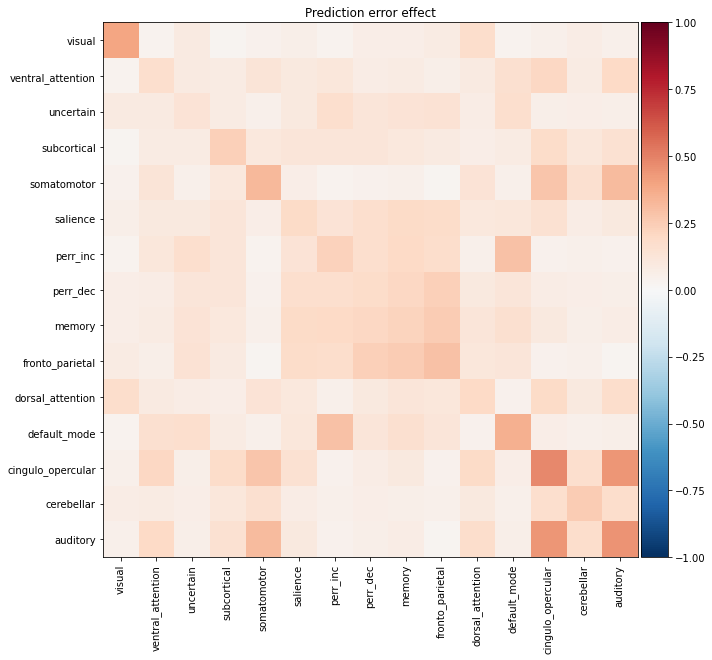

In [6]:
d_mean = np.mean(d, axis=(0, 1, 2))
plot_matrix(
    d_mean, 
    labels=network_names, 
    clim=[-1, 1], 
    title="Prediction error effect"
)